<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [120]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

'wget' is not recognized as an internal or external command,
operable program or batch file.


#### Install the required libraries and import them


In [121]:
!pip install pandas


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [122]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [123]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [124]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [125]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [126]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [127]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


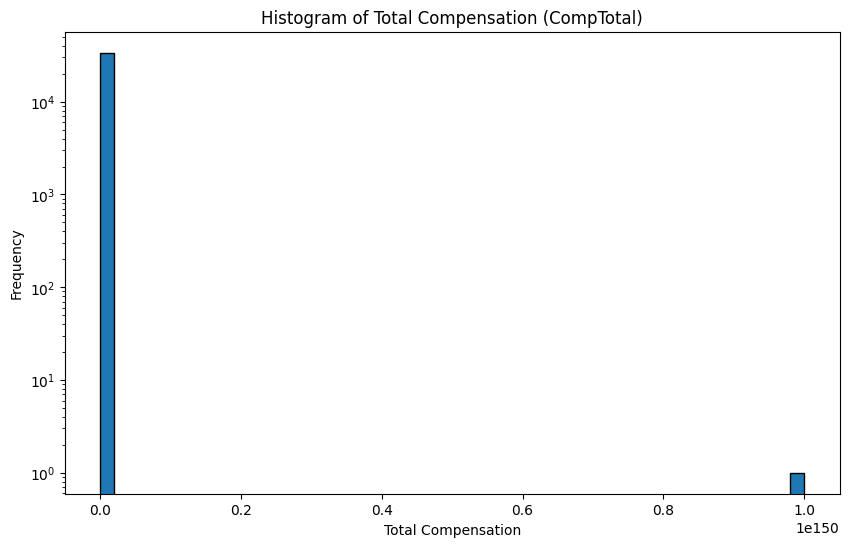

In [128]:
## Write your code here
# Execute the query to get the CompTotal data
QUERY = 'SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL'
df_comp = pd.read_sql_query(QUERY, conn)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_comp['CompTotal'], bins=50, edgecolor='k')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization
plt.show()


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


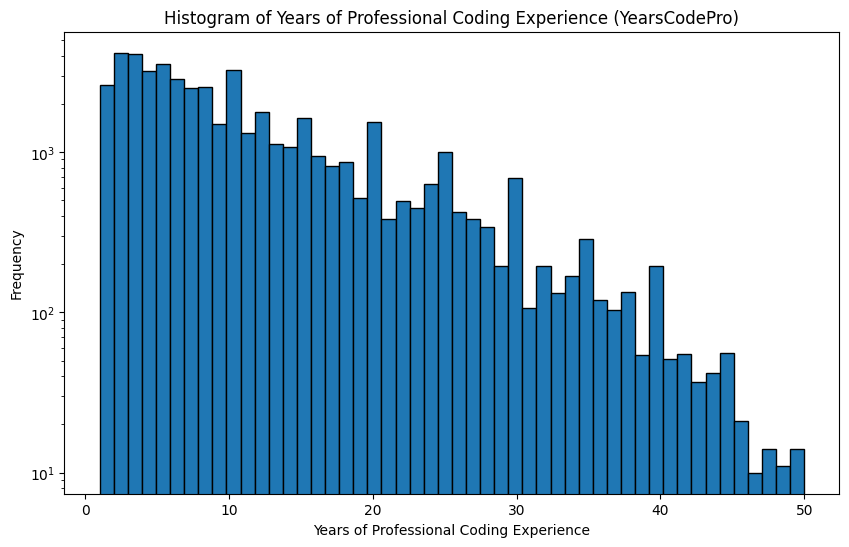

In [129]:
## Write your code here
# Execute the query to get the YearsCodePro data
QUERY = 'SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL'
df_years_code = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric, coerce errors to NaN and drop them
df_years_code['YearsCodePro'] = pd.to_numeric(df_years_code['YearsCodePro'], errors='coerce')
df_years_code.dropna(inplace=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_years_code['YearsCodePro'], bins=50, edgecolor='k')
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.yscale('log')  # Use log scale for better visualization
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [130]:
## Write your code here


**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


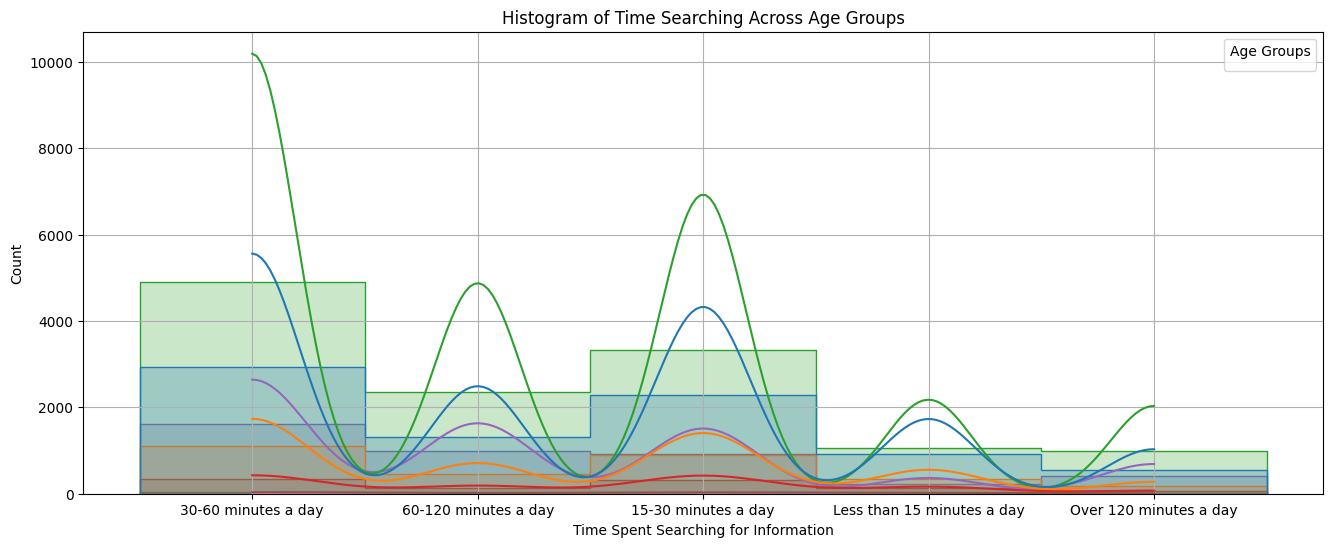

In [131]:
import seaborn as sns

# Ensure the database connection is open
if conn is None:
    conn = sqlite3.connect('survey-data.sqlite')

# Execute the query to get the TimeSearching and Age data
QUERY = 'SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL'
df_time_searching = pd.read_sql_query(QUERY, conn)

df_time_searching.head()

# Check if the dataframe is empty
if df_time_searching.empty:
    print("No data found for the query.")
else:
    # Convert Age to numeric, coerce errors to NaN and drop them
        df_time_searching.dropna(subset=['Age'], inplace=True)

 #         # Plot histograms for TimeSearching across Age Groups
        plt.figure(figsize=(16, 6))
        sns.histplot(data=df_time_searching, x='TimeSearching', hue='Age', element='step', kde=True, bins=20)

        plt.xlabel('Time Spent Searching for Information')
        plt.ylabel('Count')
        plt.title('Histogram of Time Searching Across Age Groups')
        plt.legend(title='Age Groups')
        plt.grid()
        plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


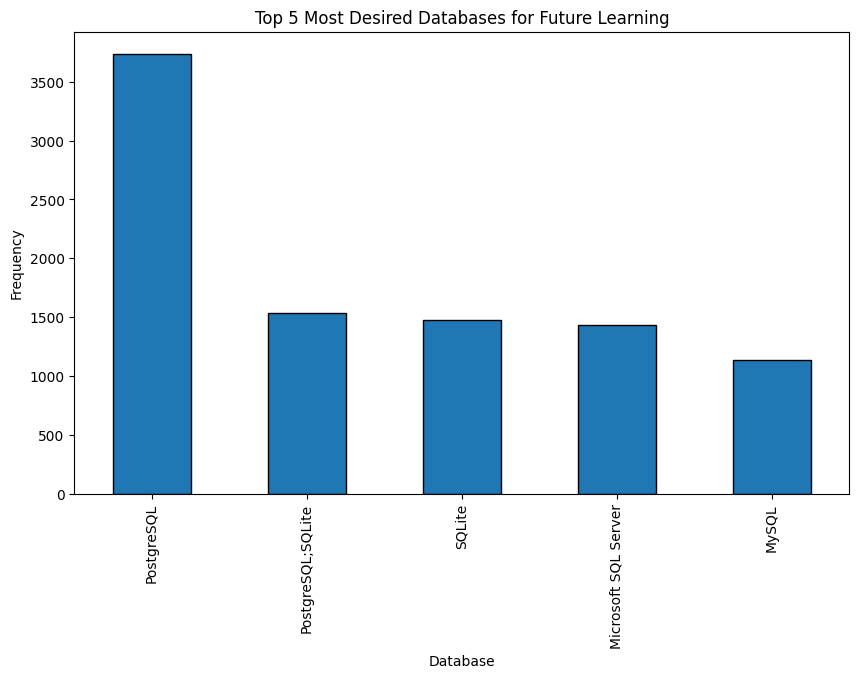

In [132]:
## Write your code here
# Execute the query to get the DatabaseWantToWorkWith data
QUERY = 'SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL'
df_db_want = pd.read_sql_query(QUERY, conn)

# Split the comma-separated values into individual rows
df_db_want = df_db_want['DatabaseWantToWorkWith'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
df_db_want.name = 'Database'

# Count the occurrences of each database
db_counts = df_db_want.value_counts().head(5)

# Plot the histogram
plt.figure(figsize=(10, 6))
db_counts.plot(kind='bar', edgecolor='k')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


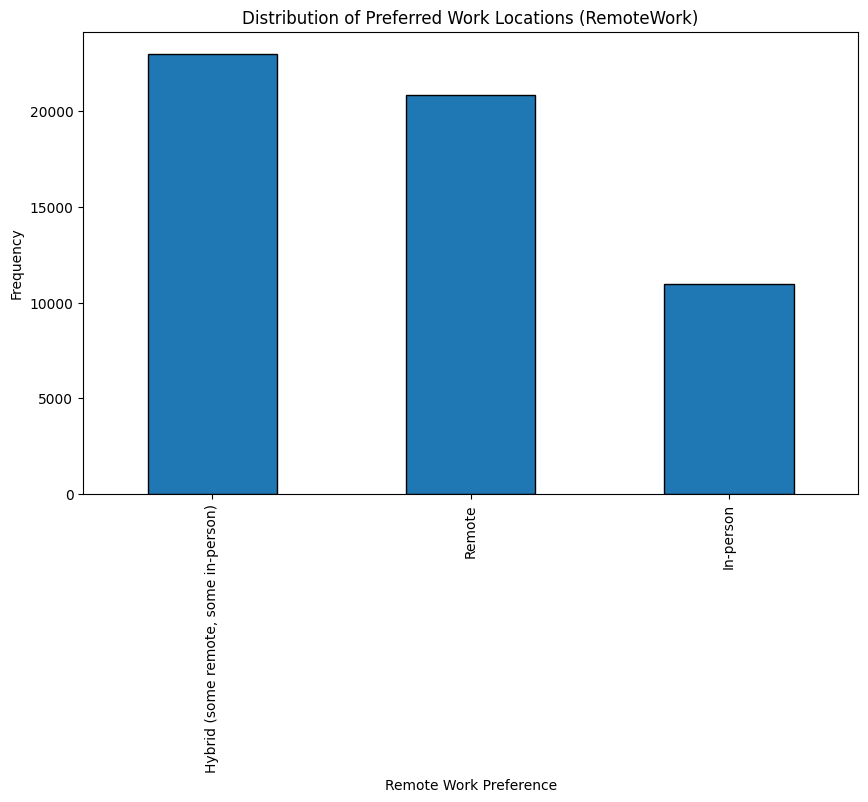

In [133]:
## Write your code here
# Execute the query to get the RemoteWork data
QUERY = 'SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL'
df_remote_work = pd.read_sql_query(QUERY, conn)

# Count the occurrences of each remote work preference
remote_work_counts = df_remote_work['RemoteWork'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
remote_work_counts.plot(kind='bar', edgecolor='k')
plt.title('Distribution of Preferred Work Locations (RemoteWork)')
plt.xlabel('Remote Work Preference')
plt.ylabel('Frequency')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


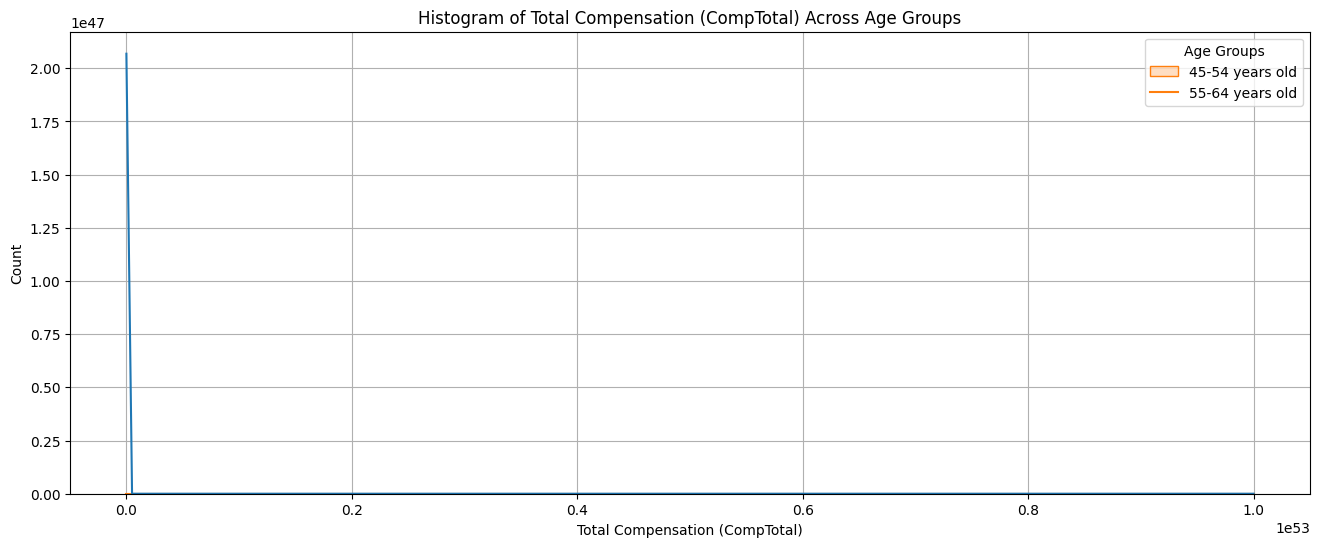

In [134]:
import seaborn as sns

# Ensure the database connection is open
if conn is None:
    conn = sqlite3.connect('survey-data.sqlite')

# Execute the query to get the CompTotal data for the specified age groups
QUERY = "SELECT Age, CompTotal FROM main WHERE Age IS NOT NULL AND CompTotal IS NOT NULL AND (Age = '45-54 years old' OR Age = '55-64 years old')"
df_CompTotal = pd.read_sql_query(QUERY, conn)

# Check if the dataframe is empty
if df_CompTotal.empty:
    print("No data found for the query.")
else:
    # Drop rows with NaN values in Age and CompTotal columns
    df_CompTotal.dropna(subset=['Age', 'CompTotal'], inplace=True)

    df_CompTotal.head(100)

    # Plot histograms for CompTotal across Age Groups
    plt.figure(figsize=(16, 6))
    sns.histplot(data=df_CompTotal, x='CompTotal', hue='Age', element='step', kde=True, bins=20)

    plt.xlabel('Total Compensation (CompTotal)')
    plt.ylabel('Count')
    plt.title('Histogram of Total Compensation (CompTotal) Across Age Groups')
    plt.legend(title='Age Groups', labels=['45-54 years old', '55-64 years old'])
    plt.grid()
    plt.show()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


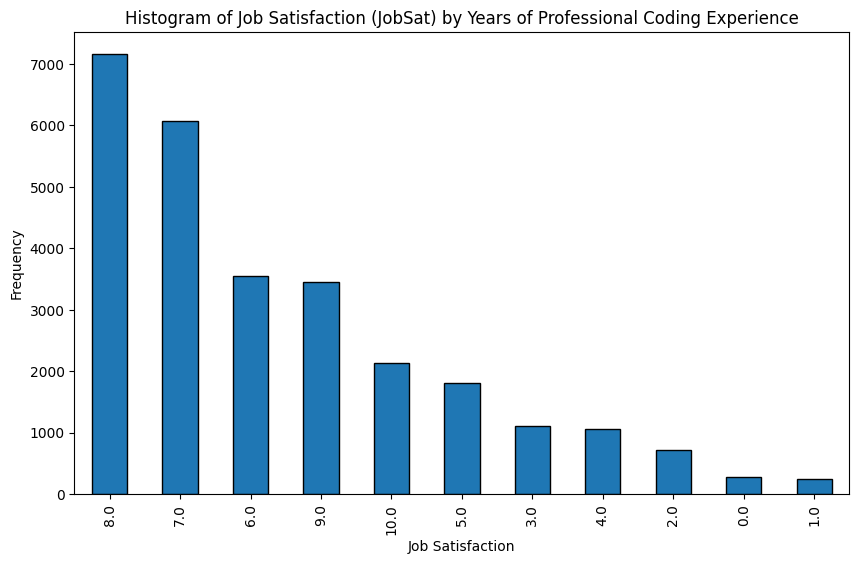

In [135]:
## Write your code here
# Ensure the database connection is open
if conn is None:
    conn = sqlite3.connect('survey-data.sqlite')

# Execute the query to get the JobSat and YearsCodePro data
QUERY = 'SELECT YearsCodePro, JobSat FROM main WHERE YearsCodePro IS NOT NULL AND JobSat IS NOT NULL'
df_job_sat = pd.read_sql_query(QUERY, conn)

# Convert YearsCodePro to numeric, coerce errors to NaN and drop them
df_job_sat['YearsCodePro'] = pd.to_numeric(df_job_sat['YearsCodePro'], errors='coerce')
df_job_sat.dropna(subset=['YearsCodePro'], inplace=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
df_job_sat['JobSat'].value_counts().plot(kind='bar', edgecolor='k')
plt.title('Histogram of Job Satisfaction (JobSat) by Years of Professional Coding Experience')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:


In [136]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
